In [1]:
import os
import shutil

input_path = '/kaggle/input/raf-db-1'
output_path = '/kaggle/working/my_data'

shutil.copytree(input_path, output_path)

'/kaggle/working/my_data'

In [2]:
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

2026-01-04 13:08:01.770566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767532081.943915      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767532081.998708      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767532082.434248      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767532082.434290      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767532082.434292      55 computation_placer.cc:177] computation placer alr

In [3]:
TRAIN_DIR = '/kaggle/working/my_data/RAF-DB/Data/train' # 这两处根据实际解压地址修改
TEST_DIR = '/kaggle/working/my_data/RAF-DB/Data/test'

In [4]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img

def augment_class_offline(class_path, target_count=3000):
    images = os.listdir(class_path)
    current_count = len(images)
    if current_count >= target_count:
        return
    
    print(f"开始增强类别 {os.path.basename(class_path)}，当前 {current_count} 张，目标 {target_count} 张")
    
    # 计算每张图需要产生多少新图
    aug_per_img = (target_count - current_count) // current_count + 1
    
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        # 加载原图
        img = load_img(img_path)
        x = img_to_array(img)
        
        for i in range(aug_per_img):
            # 1. 随机旋转
            angle = np.random.uniform(-15, 15)
            M = cv2.getRotationMatrix2D((x.shape[1]//2, x.shape[0]//2), angle, 1.0)
            aug_img = cv2.warpAffine(x, M, (x.shape[1], x.shape[0]))
            
            # 2. 随机加噪 (高斯噪声)
            noise = np.random.normal(0, 5, aug_img.shape)
            aug_img = np.clip(aug_img + noise, 0, 255).astype('uint8')
            
            # 保存新图
            new_img_name = f"aug_{i}_{img_name}"
            array_to_img(aug_img).save(os.path.join(class_path, new_img_name))
            
            # 检查是否达到目标
            if len(os.listdir(class_path)) >= target_count:
                break

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [6]:
disgust_path = os.path.join(TRAIN_DIR, 'Disgust')
fear_path = os.path.join(TRAIN_DIR, 'Fear')
angry_path = os.path.join(TRAIN_DIR, 'Angry')
neutral_path = os.path.join(TRAIN_DIR, 'Neutral')
sad_path = os.path.join(TRAIN_DIR, 'Sad')
surprise_path = os.path.join(TRAIN_DIR, 'Surprise')

# 执行离线增强：将 disgust、angry、fear类增加到 3000 张左右
augment_class_offline(disgust_path, target_count=3000)
augment_class_offline(angry_path, target_count=3000)
augment_class_offline(fear_path, target_count=3000)
augment_class_offline(neutral_path, target_count=3000)
augment_class_offline(sad_path, target_count=3000)
augment_class_offline(surprise_path, target_count=3000)

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

开始增强类别 Disgust，当前 717 张，目标 3000 张
开始增强类别 Angry，当前 705 张，目标 3000 张
开始增强类别 Fear，当前 281 张，目标 3000 张
开始增强类别 Neutral，当前 2524 张，目标 3000 张
开始增强类别 Sad，当前 1982 张，目标 3000 张
开始增强类别 Surprise，当前 1290 张，目标 3000 张
Disgust completed
Fear completed
Sad completed
Angry completed
Surprise completed
Happy completed
Neutral completed


In [7]:
test_image_paths, test_labels = createdataframe(TEST_DIR)
test = pd.DataFrame()
test['image'] = test_image_paths
test['label'] = test_labels

Disgust completed
Fear completed
Sad completed
Angry completed
Surprise completed
Happy completed
Neutral completed


In [8]:
print(train)

                                                   image    label
0      /kaggle/working/my_data/RAF-DB/Data/train/Disg...  Disgust
1      /kaggle/working/my_data/RAF-DB/Data/train/Disg...  Disgust
2      /kaggle/working/my_data/RAF-DB/Data/train/Disg...  Disgust
3      /kaggle/working/my_data/RAF-DB/Data/train/Disg...  Disgust
4      /kaggle/working/my_data/RAF-DB/Data/train/Disg...  Disgust
...                                                  ...      ...
26500  /kaggle/working/my_data/RAF-DB/Data/train/Neut...  Neutral
26501  /kaggle/working/my_data/RAF-DB/Data/train/Neut...  Neutral
26502  /kaggle/working/my_data/RAF-DB/Data/train/Neut...  Neutral
26503  /kaggle/working/my_data/RAF-DB/Data/train/Neut...  Neutral
26504  /kaggle/working/my_data/RAF-DB/Data/train/Neut...  Neutral

[26505 rows x 2 columns]


In [9]:
print(test)
print(test['image'])

                                                  image    label
0     /kaggle/working/my_data/RAF-DB/Data/test/Disgu...  Disgust
1     /kaggle/working/my_data/RAF-DB/Data/test/Disgu...  Disgust
2     /kaggle/working/my_data/RAF-DB/Data/test/Disgu...  Disgust
3     /kaggle/working/my_data/RAF-DB/Data/test/Disgu...  Disgust
4     /kaggle/working/my_data/RAF-DB/Data/test/Disgu...  Disgust
...                                                 ...      ...
3063  /kaggle/working/my_data/RAF-DB/Data/test/Neutr...  Neutral
3064  /kaggle/working/my_data/RAF-DB/Data/test/Neutr...  Neutral
3065  /kaggle/working/my_data/RAF-DB/Data/test/Neutr...  Neutral
3066  /kaggle/working/my_data/RAF-DB/Data/test/Neutr...  Neutral
3067  /kaggle/working/my_data/RAF-DB/Data/test/Neutr...  Neutral

[3068 rows x 2 columns]
0       /kaggle/working/my_data/RAF-DB/Data/test/Disgu...
1       /kaggle/working/my_data/RAF-DB/Data/test/Disgu...
2       /kaggle/working/my_data/RAF-DB/Data/test/Disgu...
3       /kaggle/worki

In [ ]:
from tqdm.notebook import tqdm
from tensorflow.keras.applications.resnet50 import preprocess_input
def extract_features_transfer(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="rgb", target_size=(128, 128)) # 修改尺寸
        img = img_to_array(img)
        img = preprocess_input(img)
        features.append(img)
    features = np.array(features)
    return features

# 重新提取特征
train_features = extract_features_transfer(train['image'])
test_features = extract_features_transfer(test['image'])

# 使用 ResNet50 专门的预处理函数
from tensorflow.keras.applications.resnet50 import preprocess_input
x_train = preprocess_input(train_features)
x_test = preprocess_input(test_features)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

In [14]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# 1. 加载预训练模型 (注意 input_shape 与上面尺寸一致)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# 2. 冻结卷积层，不让它们在初始阶段被训练破坏
base_model.trainable = False 

# 3. 搭建新的分类头 (Top Layers)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# 4. 组装最终模型
model = Model(inputs=base_model.input, outputs=predictions)

# 5. 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("迁移学习模型构建完成，已加载 ResNet50 预训练权重。")

I0000 00:00:1767532157.379000      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
迁移学习模型构建完成，已加载 ResNet50 预训练权重。


In [17]:
print("原始数据分布：")
print(train['label'].value_counts())

原始数据分布：
label
Neutral     5048
Happy       4772
Sad         3964
Surprise    3435
Disgust     3146
Angry       3131
Fear        3009
Name: count, dtype: int64


In [18]:
from sklearn.utils import class_weight
import numpy as np

# 计算基础权重（Happy 较多，自动降低权重）
y_train_raw = np.argmax(y_train, axis=1)
classes_unique = np.unique(y_train_raw)
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes_unique,
    y=y_train_raw
)
d_class_weights = dict(enumerate(class_weights_array))

indices = {label: list(le.classes_).index(label) for label in le.classes_}

# 手动再微调，结果不理想继续调整，重新训练
d_class_weights[indices['Angry']] *= 1.2

d_class_weights[indices['Sad']] *= 1.2

d_class_weights[indices['Fear']] *= 0.9

d_class_weights[indices['Disgust']] *= 0.9 

d_class_weights[indices['Happy']] *= 0.8

d_class_weights[indices['Neutral']] *= 1.0

print("基于 3000 目标线的温和权重策略:", d_class_weights)

基于 3000 目标线的温和权重策略: {0: np.float64(1.4512022630834511), 1: np.float64(1.0832122423031514), 2: np.float64(1.1325309784930921), 3: np.float64(0.6347742785295174), 4: np.float64(0.7500848992528866), 5: np.float64(1.1462447743981548), 6: np.float64(1.1023081721771677)}


In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. 创建 Checkpoint：只保存表现最好的模型
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# 2. 创建 EarlyStopping：防止过拟合
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=10,         # 如果连续10个epoch验证集损失不下降，就停掉训练
    restore_best_weights=True # 停止后自动回滚到表现最好的那一轮权重
)

In [20]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# 定义数据增强
datagen = ImageDataGenerator(
    rotation_range=20,       # 加大旋转
    width_shift_range=0.12,
    height_shift_range=0.08, # 稍微加大，但注意别切掉眉毛
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.6, 1.4], # 大幅增加亮度变化范围
    horizontal_flip=True,
    fill_mode='nearest'
)

# 使用 fit_generator
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=16),
    epochs=60,
    validation_data=(x_test, y_test),
    class_weight=d_class_weights, # 核心：应用权重 12.31
    callbacks=[checkpoint, early_stop]
)# 记得带上上面的 checkpoint

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1767532167.821783     127 service.cc:152] XLA service 0x7d61b0013720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767532167.821843     127 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1767532169.718197     127 cuda_dnn.cc:529] Loaded cuDNN version 91002


   3/1657 ━━━━━━━━━━━━━━━━━━━━ 1:14 45ms/step - accuracy: 0.1910 - loss: 2.7789  

I0000 00:00:1767532173.353888     127 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3486 - loss: 2.3948
Epoch 1: val_accuracy improved from -inf to 0.46415, saving model to best_model.keras
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 144s 80ms/step - accuracy: 0.3487 - loss: 2.3945 - val_accuracy: 0.4641 - val_loss: 1.5019
Epoch 2/60
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4459 - loss: 1.4652
Epoch 2: val_accuracy improved from 0.46415 to 0.50065, saving model to best_model.keras
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 118s 71ms/step - accuracy: 0.4459 - loss: 1.4652 - val_accuracy: 0.5007 - val_loss: 1.4270
Epoch 3/60
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4473 - loss: 1.4608
Epoch 3: val_accuracy improved from 0.50065 to 0.53357, saving model to best_model.keras
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 118s 71ms/step - accuracy: 0.4473 - loss: 1.4608 - val_accuracy: 0.5336 - val_loss: 1.3297
Epoch 4/60
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4653 - loss: 1.4239
Epoch 4: val_accuracy did

In [21]:
import tensorflow as tf
# 当模型准确率不再大幅提升时，执行以下代码进行微调
base_model.trainable = True  ##解冻

fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1), 
    metrics=['accuracy']
)

# 继续训练，自选轮数
history_finetune = model.fit(datagen.flow(x_train, y_train, batch_size=16),
                             epochs=40,
                             initial_epoch=20,
                             validation_data=(x_test, y_test),
                             callbacks=[checkpoint, early_stop])

Epoch 21/40
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4477 - loss: 1.6135
Epoch 21: val_accuracy improved from 0.56323 to 0.57236, saving model to best_model.keras
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 174s 88ms/step - accuracy: 0.4478 - loss: 1.6135 - val_accuracy: 0.5724 - val_loss: 1.4568
Epoch 22/40
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5203 - loss: 1.4571
Epoch 22: val_accuracy improved from 0.57236 to 0.60756, saving model to best_model.keras
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 127s 77ms/step - accuracy: 0.5203 - loss: 1.4571 - val_accuracy: 0.6076 - val_loss: 1.3934
Epoch 23/40
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5729 - loss: 1.3694
Epoch 23: val_accuracy improved from 0.60756 to 0.65091, saving model to best_model.keras
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 127s 77ms/step - accuracy: 0.5729 - loss: 1.3693 - val_accuracy: 0.6509 - val_loss: 1.3271
Epoch 24/40
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6017 - loss: 1.3179
Epoc

In [22]:
from keras.models import model_from_json

In [23]:
from keras.models import load_model

# 直接加载 checkpoint 过程中保存的最佳模型
model = load_model("best_model.keras")

print("可开始表情识别预测")

可开始表情识别预测


In [24]:
label = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [25]:
from tensorflow.keras.applications.resnet50 import preprocess_input

def ef(image):
    # 必须转为 RGB，尺寸同上
    img = load_img(image, color_mode="rgb", target_size=(128, 128)) 
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array)
    return img_preprocessed

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  Sad


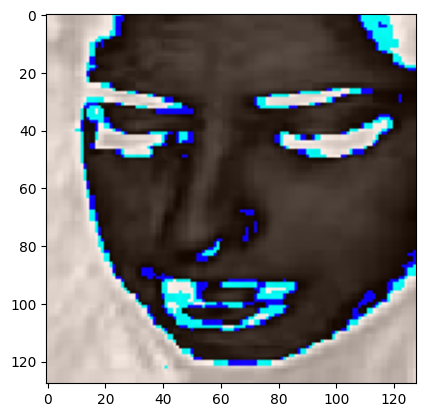

In [33]:
image = '/kaggle/working/my_data/RAF-DB/Data/test/Sad/test_0100_aligned.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img[0].astype('uint8'))

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
model prediction is  Neutral


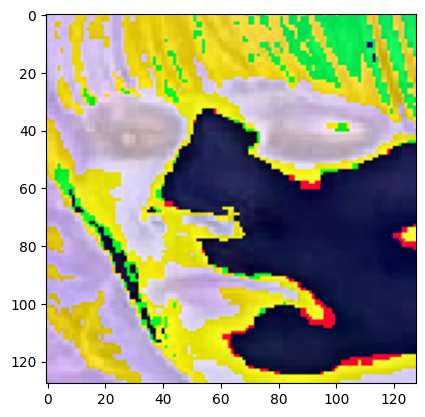

In [28]:
image = '/kaggle/working/my_data/RAF-DB/Data/test/Neutral/test_2392_aligned.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img[0].astype('uint8'))

In [29]:
image = '/content/data/test/disgust/PrivateTest_85928336.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img[0].astype('uint8'))

original image is of disgust


FileNotFoundError: [Errno 2] No such file or directory: '/content/data/test/disgust/PrivateTest_85928336.jpg'

In [ ]:
image = '/content/data/test/surprise/PrivateTest_104142.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img[0].astype('uint8'))

In [ ]:
image = '/kaggle/working/my_data/data/test/angry/PrivateTest_10131363.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img[0].astype('uint8'))